In [36]:
import glob
import csv
import re  # Import the regular expressions module
import matplotlib.pyplot as plt
import numpy as np

In [37]:


# Read progress data from CSV files and store them into lists
csv_files = glob.glob('progress/progress_*.csv')

# Create empty lists to store data from all files
perfect_pro = []
imperfect_pro = []
non_recover_pro = []
recover_pro = []
error_pro = []
challenge_pro = []
effective_pro = []
alternative_pro = []
confused_pro = []
easy_pro = []




# Loop through each file
for csv_file in csv_files:
    arrays_from_csv = []
    sentences_from_csv = []
    # Open and read the CSV file
    with open(csv_file, 'r') as file:
        for row in file:
            # Check if the first element can be converted to an integer
            try:
                int(row[0])
                is_numeric = True
            except ValueError:
                is_numeric = False
            
            if is_numeric:
                line = re.split('[ ,]', row.strip())
                arrays_from_csv.append([int(x) for x in line])
            else:
                sentences_from_csv.append(row)
                
    perfect_pro.append(arrays_from_csv[0])
    imperfect_pro.append(arrays_from_csv[1])
    non_recover_pro.append(arrays_from_csv[2])
    recover_pro.append(arrays_from_csv[3])
    error_pro.append(arrays_from_csv[4])
    challenge_pro.append(arrays_from_csv[5])
    effective_pro.append(arrays_from_csv[6])
    alternative_pro.append(arrays_from_csv[7])
    confused_pro.append(sentences_from_csv[0])
    easy_pro.append(sentences_from_csv[1])

print("perfect_pro: ", perfect_pro)
print("confused_pro:", confused_pro)
print("easy_pro: ", easy_pro)


perfect_pro:  [[100, 30, 100, 100, 100, 100, 70, 80, 90, 90, 90, 100, 100, 100, 100], [20, 20, 20, 20, 20, 40, 40, 55, 58, 60, 60, 90, 100, 100, 100], [10, 10, 15, 20, 20, 50, 50, 60, 65, 70, 70, 85, 100, 100, 100], [30, 38, 70, 78, 79, 85, 88, 90, 92, 98, 92, 48, 59, 60, 78], [25, 25, 30, 35, 40, 50, 55, 65, 65, 80, 90, 99, 100, 100, 100], [10, 10, 65, 75, 75, 80, 84, 85, 87, 89, 90, 92, 95, 96, 97], [20, 0, 50, 80, 50, 100, 50, 80, 90, 80, 50, 80, 100, 100, 100], [25, 25, 40, 45, 48, 50, 55, 60, 74, 80, 90, 95, 100, 100, 100], [20, 18, 25, 35, 37, 40, 48, 55, 60, 65, 74, 85, 100, 100, 100], [5, 7, 15, 17, 19, 20, 22, 25, 25, 27, 30, 45, 60, 70, 90], [20, 20, 25, 30, 32, 40, 45, 55, 59, 70, 75, 80, 100, 100, 100], [20, 20, 30, 35, 38, 40, 45, 55, 59, 70, 75, 80, 90, 95, 100], [20, 20, 35, 35, 40, 50, 55, 65, 65, 70, 70, 75, 80, 80, 90], [0, 0, 10, 10, 10, 40, 50, 50, 50, 70, 70, 80, 90, 100, 100], [5, 5, 12, 13, 15, 17, 25, 30, 32, 45, 55, 65, 85, 95, 98]]
confused_pro: ['yes i did an

In [38]:
csv_files = glob.glob('preference/progress_*.csv')

# Create empty lists to store data from all files
perfect_pre = []
imperfect_pre = []
non_recover_pre = []
recover_pre = []
error_pre = []
challenge_pre = []
effective_pre = []
alternative_pre = []
confused_pre = []
easy_pre = []

# Loop through each file
for csv_file in csv_files:
    arrays_from_csv = []
    sentences_from_csv = []
    # Open and read the CSV file
    with open(csv_file, 'r') as file:
        for row in file:
            # Check if the first element can be converted to an integer
            try:
                int(row[0])
                is_numeric = True
            except ValueError:
                is_numeric = False
            
            if is_numeric:
                line = re.split('[ ,]', row.strip())
                arrays_from_csv.append([int(x) for x in line])
            else:
                sentences_from_csv.append(row)
                
    perfect_pre.append(arrays_from_csv[0])
    imperfect_pre.append(arrays_from_csv[1])
    non_recover_pre.append(arrays_from_csv[2])
    recover_pre.append(arrays_from_csv[3])
    error_pre.append(arrays_from_csv[4])
    challenge_pre.append(arrays_from_csv[5])
    effective_pre.append(arrays_from_csv[6])
    alternative_pre.append(arrays_from_csv[7])
    confused_pre.append(sentences_from_csv[0])
    easy_pre.append(sentences_from_csv[1])

18
18
18
18
18
18
18
18
18
18
18
18
18
18
18


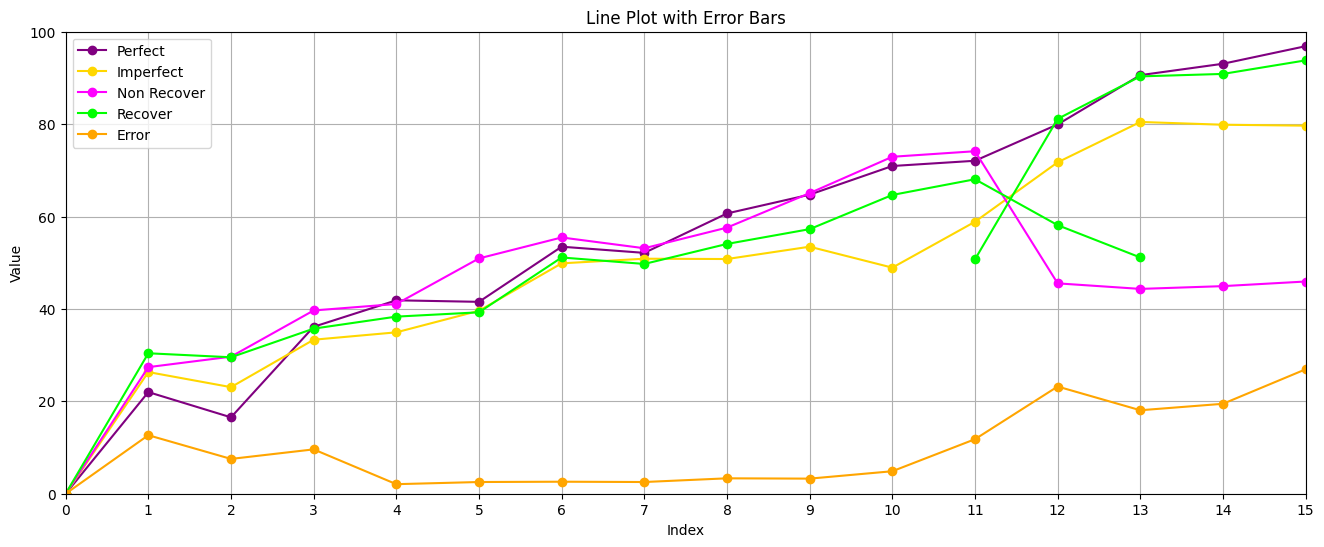

In [41]:



for i in recover_pro:
    print(len(i))

# Function to calculate mean and standard deviation
def calc_mean_std(data):
    data_np = np.array(data)
    mean = np.mean(data_np, axis=0)
    std = np.std(data_np, axis=0)
    return mean, std

# Calculate mean and standard deviation for each category
mean_perfect, std_perfect = calc_mean_std(perfect_pro)
mean_imperfect, std_imperfect = calc_mean_std(imperfect_pro)
mean_non_recover, std_non_recover = calc_mean_std(non_recover_pro)
mean_recover, std_recover = calc_mean_std(recover_pro)
mean_error, std_error = calc_mean_std(error_pro)

# Create the line plot
plt.figure(figsize=(16, 6))

# Adding a zero at the beginning and shifting the line one point to the right
def shift_and_prepend_zero(data):
    return [0] + list(data)

# Plotting without error bars, using fancy colors
plt.plot(range(len(mean_perfect)+1), shift_and_prepend_zero(mean_perfect), label='Perfect', linestyle='-', marker='o', color='purple')
plt.plot(range(len(mean_imperfect)+1), shift_and_prepend_zero(mean_imperfect), label='Imperfect', linestyle='-', marker='o', color='gold')
plt.plot(range(len(mean_non_recover)+1), shift_and_prepend_zero(mean_non_recover), label='Non Recover', linestyle='-', marker='o', color='magenta')

# Split the data at index 11 for recover_pro
x_values1 = [0] + list(range(1, 14))  # shifted by 1 to the right
 # shifted by 1 to the right
y_values1 = shift_and_prepend_zero(mean_recover[:13])

x_values2 = list(range(11, 11 + len(mean_recover[13:])))  # shifted by 1 to the right
y_values2 = mean_recover[13:]

plt.plot(x_values1, y_values1, linestyle='-', marker='o', color='lime')
plt.plot(x_values2, y_values2, linestyle='-', marker='o', color='lime', label='Recover')

plt.plot(range(len(mean_error)+1), shift_and_prepend_zero(mean_error), label='Error', linestyle='-', marker='o', color='orange')





# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot with Error Bars')
plt.ylim(0, 100)
# Set the x-axis limits and ticks
plt.xlim(0, 15)
plt.xticks(range(0, 16))

plt.legend()

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


18
18
18
18
18
18
18
18
18
18
18


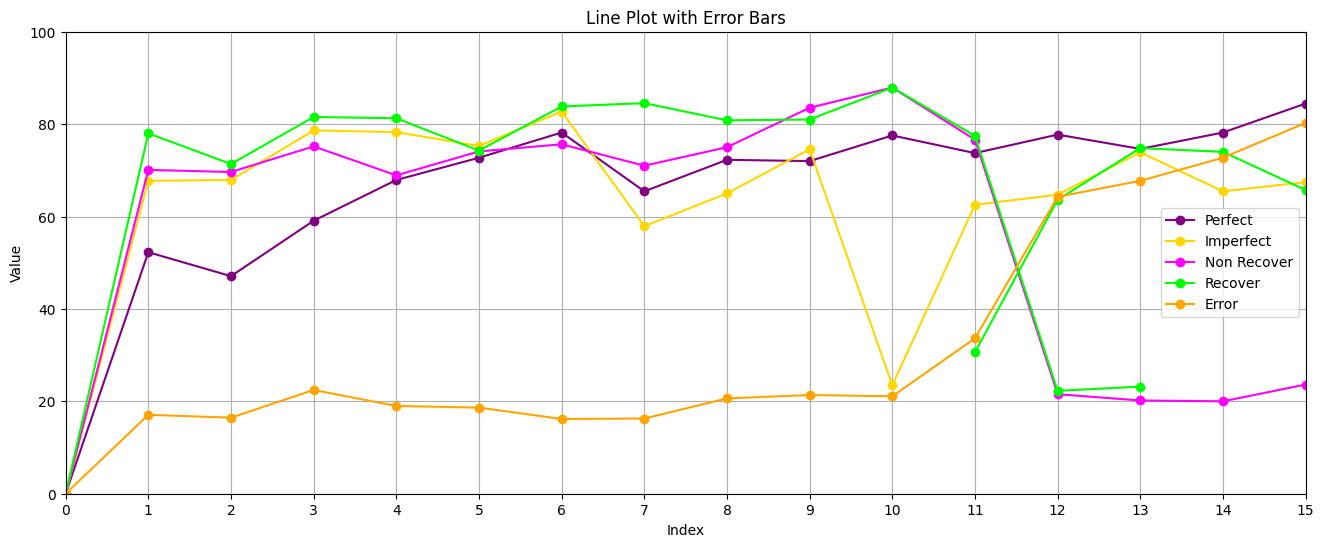

In [40]:

for i in recover_pre:
    print(len(i))

# Function to calculate mean and standard deviation
def calc_mean_std(data):
    data_np = np.array(data)
    mean = np.mean(data_np, axis=0)
    std = np.std(data_np, axis=0)
    return mean, std

# Adding a zero at the beginning and shifting the line one point to the right
def shift_and_prepend_zero(data):
    return [0] + list(data)

# Create the line plot
plt.figure(figsize=(16, 6))


# Calculate mean and standard deviation for each *_pre category
mean_perfect_pre, std_perfect_pre = calc_mean_std(perfect_pre)
mean_imperfect_pre, std_imperfect_pre = calc_mean_std(imperfect_pre)
mean_non_recover_pre, std_non_recover_pre = calc_mean_std(non_recover_pre)
mean_recover_pre, std_recover_pre = calc_mean_std(recover_pre)
mean_error_pre, std_error_pre = calc_mean_std(error_pre)

# Plotting without error bars, using fancy colors
plt.plot(range(len(mean_perfect_pre)+1), shift_and_prepend_zero(mean_perfect_pre), label='Perfect', linestyle='-', marker='o', color='purple')
plt.plot(range(len(mean_imperfect_pre)+1), shift_and_prepend_zero(mean_imperfect_pre), label='Imperfect', linestyle='-', marker='o', color='gold')
plt.plot(range(len(mean_non_recover_pre)+1), shift_and_prepend_zero(mean_non_recover_pre), label='Non Recover', linestyle='-', marker='o', color='magenta')

# Split the data at index 11 for recover_pro
x_values1 = [0] + list(range(1, 14))  # shifted by 1 to the right
# shifted by 1 to the right
y_values1 = shift_and_prepend_zero(mean_recover_pre[:13])

x_values2 = list(range(11, 11 + len(mean_recover_pre[13:])))  # shifted by 1 to the right
y_values2 = mean_recover_pre[13:]

plt.plot(x_values1, y_values1, linestyle='-', marker='o', color='lime')
plt.plot(x_values2, y_values2, linestyle='-', marker='o', color='lime', label='Recover')

plt.plot(range(len(mean_error_pre)+1), shift_and_prepend_zero(mean_error_pre), label='Error', linestyle='-', marker='o', color='orange')


# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot with Error Bars')
plt.ylim(0, 100)
# Set the x-axis limits and ticks
plt.xlim(0, 15)
plt.xticks(range(0, 16))

plt.legend()

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


